# Exploratary Data Analysis 3

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbs
import geopandas as gpd
import folium 
from folium.plugins import HeatMap

In [9]:
# Load the Parquet file into a Pandas DataFrame
clean_df = pd.read_parquet("../data/curated/tlc_data/tdf.parquet/")

In [10]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line breaks in the output

# Get summary statistics for all columns, including non-numerical ones
summary_stats = clean_df.describe(include='all')

# Display the summary statistics
print(summary_stats)

        PULocationID  DOLocationID  trip_duration   pickup_hour  dropoff_hour pickup_date dropoff_date
count   1.666073e+07  1.666073e+07   1.666073e+07  1.666073e+07  1.666073e+07    16660730     16660730
unique           NaN           NaN            NaN           NaN           NaN         187          187
top              NaN           NaN            NaN           NaN           NaN  2023-12-14   2023-12-14
freq             NaN           NaN            NaN           NaN           NaN      123379       122906
mean    1.646533e+02  1.636566e+02   1.750681e+01  1.430633e+01  1.435736e+01         NaN          NaN
std     6.342481e+01  6.985936e+01   1.357135e+01  5.807085e+00  5.929726e+00         NaN          NaN
min     1.000000e+00  1.000000e+00   1.000000e+00  0.000000e+00  0.000000e+00         NaN          NaN
25%     1.320000e+02  1.130000e+02   8.000000e+00  1.100000e+01  1.100000e+01         NaN          NaN
50%     1.610000e+02  1.620000e+02   1.400000e+01  1.500000e+01  1.500000

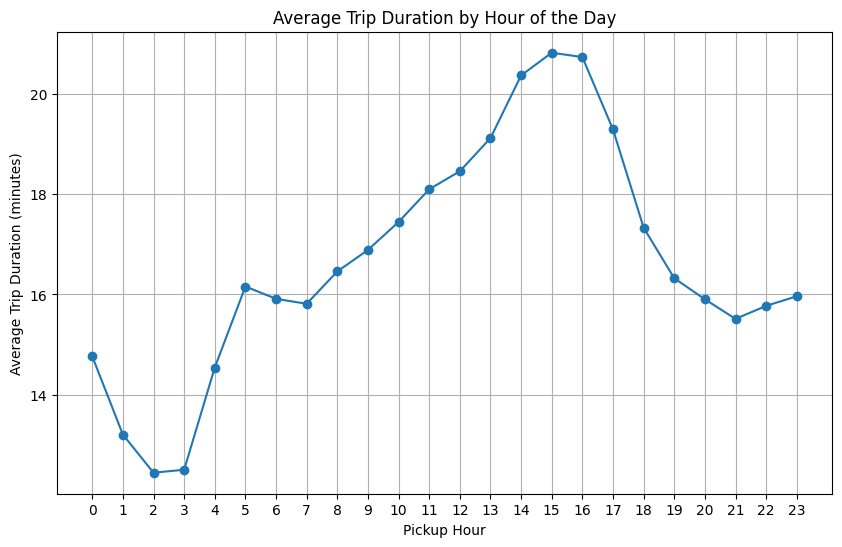

In [11]:
df = pd.DataFrame(clean_df)

# Group by pickup_hour and calculate the average trip duration
average_trip_duration = df.groupby('pickup_hour')['trip_duration'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_trip_duration.index, average_trip_duration.values, marker='o')
plt.title('Average Trip Duration by Hour of the Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [12]:
# demand by hour of the day
hourly_demand = df.groupby('pickup_hour').size()

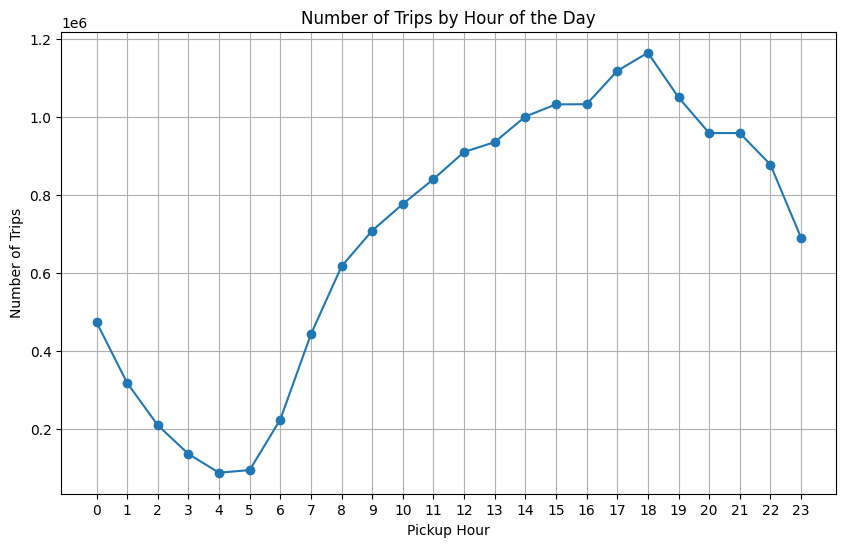

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_demand.index, hourly_demand.values, marker='o')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()